In [1]:
import pandas as pd

In [2]:
original_dataFrame = pd.read_csv("reddit_comments_analysis.csv")

In [3]:
original_dataFrame.shape

(2987, 10)

In [4]:
original_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   post_id       2987 non-null   object 
 1   post_title    2987 non-null   object 
 2   subreddit     2987 non-null   object 
 3   post_url      2987 non-null   object 
 4   flair_text    2441 non-null   object 
 5   score         2987 non-null   int64  
 6   comments      2987 non-null   int64  
 7   upvote_ratio  2987 non-null   float64
 8   date-time     2987 non-null   object 
 9   year          2987 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 233.5+ KB


In [5]:
original_dataFrame.comments

0       186
1       133
2       111
3       230
4       228
       ... 
2982      6
2983      1
2984      2
2985     10
2986     10
Name: comments, Length: 2987, dtype: int64

In [6]:
# renaming the column name: comments to comments_count
original_dataFrame.rename(columns={'comments':'comments_count'}, inplace=True)
original_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         2987 non-null   object 
 1   post_title      2987 non-null   object 
 2   subreddit       2987 non-null   object 
 3   post_url        2987 non-null   object 
 4   flair_text      2441 non-null   object 
 5   score           2987 non-null   int64  
 6   comments_count  2987 non-null   int64  
 7   upvote_ratio    2987 non-null   float64
 8   date-time       2987 non-null   object 
 9   year            2987 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 233.5+ KB


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [8]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rajkumar.p\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajkumar.p\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajkumar.p\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
original_dataFrame.post_title

0       [Project] From books to presentations in 10s w...
1       [D] A Demo from 1993 of 32-year-old Yann LeCun...
2       [R] First Order Motion Model applied to animat...
3       [N] AI can turn old photos into moving Images ...
4       [D] This AI reveals how much time politicians ...
                              ...                        
2982    We live in beautiful times where you can learn...
2983      Yann LeCun’s Deep Learning Course Free From NYU
2984    You Can Now Learn for FREE: 9 Courses by Googl...
2985    Chatbot trained on "public domain social media...
2986    Tesla's Neural Net can now identify red and gr...
Name: post_title, Length: 2987, dtype: object

In [12]:
posts_comments_dataFrame = pd.read_csv("reddit_posts_comments.csv")
posts_comments_dataFrame

,post_id,comment
0,gh1dj9,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,The future 🤯
2,gh1dj9,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,Ohh the nightmare of making this into a stable...
...,...,...
223169,efk5n3,LiDAR is mot powerful sensor for the auto driv...
223170,efk5n3,So it can now idenrify traffic lights? Musk pr...
223171,efk5n3,Hydranet bro!
223172,efk5n3,It even shows flashing yellow turn arrows.


In [13]:
reddit_subject = original_dataFrame.subreddit.value_counts()
reddit_subject

artificial         999
MachineLearning    998
datascience        990
Name: subreddit, dtype: int64

In [14]:
# Merging the two files by using the common column "post_id"

merged_dataFrame = pd.merge(original_dataFrame, posts_comments_dataFrame, how='inner', on='post_id')
merged_dataFrame

,post_id,post_title,subreddit,post_url,flair_text,score,comments_count,upvote_ratio,date-time,year,comment
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,The future 🤯
2,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Ohh the nightmare of making this into a stable...
...,...,...,...,...,...,...,...,...,...,...,...
223163,efk5n3,Tesla's Neural Net can now identify red and gr...,artificial,https://www.teslarati.com/tesla-holiday-update...,NaN,80,10,0.89,2019-12-25 18:50:50,2019,LiDAR is mot powerful sensor for the auto driv...
223164,efk5n3,Tesla's Neural Net can now identify red and gr...,artificial,https://www.teslarati.com/tesla-holiday-update...,NaN,80,10,0.89,2019-12-25 18:50:50,2019,So it can now idenrify traffic lights? Musk pr...
223165,efk5n3,Tesla's Neural Net can now identify red and gr...,artificial,https://www.teslarati.com/tesla-holiday-update...,NaN,80,10,0.89,2019-12-25 18:50:50,2019,Hydranet bro!
223166,efk5n3,Tesla's Neural Net can now identify red and gr...,artificial,https://www.teslarati.com/tesla-holiday-update...,NaN,80,10,0.89,2019-12-25 18:50:50,2019,It even shows flashing yellow turn arrows.


In [15]:
merged_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223168 entries, 0 to 223167
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   post_id         223168 non-null  object 
 1   post_title      223168 non-null  object 
 2   subreddit       223168 non-null  object 
 3   post_url        223168 non-null  object 
 4   flair_text      198430 non-null  object 
 5   score           223168 non-null  int64  
 6   comments_count  223168 non-null  int64  
 7   upvote_ratio    223168 non-null  float64
 8   date-time       223168 non-null  object 
 9   year            223168 non-null  int64  
 10  comment         223159 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 20.4+ MB


In [16]:
merged_dataFrame_comments_subreddit = merged_dataFrame[['comment', 'subreddit']]
merged_dataFrame_comments_subreddit

,comment,subreddit
0,Twitter thread: [https://twitter.com/cyrildiag...,MachineLearning
1,The future 🤯,MachineLearning
2,Simple yet very useful. Thank you for sharing ...,MachineLearning
3,"Almost guaranteed, Apple will copy your idea i...",MachineLearning
4,Ohh the nightmare of making this into a stable...,MachineLearning
...,...,...
223163,LiDAR is mot powerful sensor for the auto driv...,artificial
223164,So it can now idenrify traffic lights? Musk pr...,artificial
223165,Hydranet bro!,artificial
223166,It even shows flashing yellow turn arrows.,artificial


In [17]:
# checking total null values
merged_dataFrame_comments_subreddit.isnull().sum()

comment      9
subreddit    0
dtype: int64

In [18]:
merged_dataFrame_comments_subreddit.dropna(inplace=True)

C:\Users\rajkumar.p\AppData\Local\Temp\ipykernel_18672\421388838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataFrame_comments_subreddit.dropna(inplace=True)


In [19]:
merged_dataFrame_comments_subreddit.isnull().sum()

comment      0
subreddit    0
dtype: int64

In [20]:
merged_dataFrame_comments_subreddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223159 entries, 0 to 223167
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   comment    223159 non-null  object
 1   subreddit  223159 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB


In [21]:
import re

In [22]:
merged_dataFrame_comments_subreddit.comment[0]

'Twitter thread: [https://twitter.com/cyrildiagne/status/1259441154606669824](https://twitter.com/cyrildiagne/status/1259441154606669824)\n\nCode: [https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard](https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard)\n\nBackground removal is done with U^(2-Net) (Qin et Al, Pattern Recognition 2020): [https://github.com/NathanUA/U-2-Net](https://github.com/NathanUA/U-2-Net)\n\n**/!\\\\ EDIT:** You can now subscribe to a beta program to get early access to the app: [https://arcopypaste.app](https://arcopypaste.app)  !'

In [23]:
x = "Twitter thread: [https://twitter.com/cyrildiagne/status/1259441154606669824](https://twitter.com/cyrildiagne/status/1259441154606669824)\n\nCode: [https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard](https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard)\n\nBackground removal is done with U^(2-Net) (Qin et Al, Pattern Recognition 2020): [https://github.com/NathanUA/U-2-Net](https://github.com/NathanUA/U-2-Net)\n\n**/!\\\\ EDIT:** You can now subscribe to a beta program to get early access to the app: [https://arcopypaste.app](https://arcopypaste.app)  !"

b = re.sub("http[s]?://\S+", '', x)
b

'Twitter thread: [\n\nCode: [\n\nBackground removal is done with U^(2-Net) (Qin et Al, Pattern Recognition 2020): [\n\n**/!\\\\ EDIT:** You can now subscribe to a beta program to get early access to the app: [  !'

In [24]:
# removing the URL's
def urls_removal_function(document):
    urls = re.compile(r'http[s]?://\S+')
    
    return urls.sub(r'', document) 

In [25]:
def emoji_removal_function(document):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"          # emoticons
        u"\U0001F300-\U0001F5FF"          # symbols & pictographs
        u"\U0001F680-\U0001F6FF"          # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"          # flags (iOS)
        u"\U00002500-\U00002BEF"          # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"                         # dingbats
        u"\u3030"
        "]+", re.UNICODE)
    
    return emoji_pattern.sub(r'', document)

In [26]:
stop_words = stopwords.words('english')

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
import string

In [29]:
def comments_cleaning_function(document):
    document = str(document)
    
    # convert to L.case and stripping the whitespaces
    document = document.lower().strip()
    
    # removing punctuations and digits
    document = "".join([char for char in document if char not in string.punctuation and not char.isdigit()])
    
    # splitting the document into tokens and removing stopwords
    document = " ".join([token for token in document.split() if token not in stop_words])
    
    # lemmatizing the document
    document = "".join([lemmatizer.lemmatize(word) for word in document])
    
    return document

In [30]:
# dataset cleaning
merged_dataFrame_comments_subreddit["comment"] = merged_dataFrame_comments_subreddit["comment"].apply(urls_removal_function)
merged_dataFrame_comments_subreddit["comment"] = merged_dataFrame_comments_subreddit["comment"].apply(emoji_removal_function)          
merged_dataFrame_comments_subreddit["comment"] = merged_dataFrame_comments_subreddit["comment"].apply(comments_cleaning_function)

C:\Users\rajkumar.p\AppData\Local\Temp\ipykernel_18672\329967835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataFrame_comments_subreddit["comment"] = merged_dataFrame_comments_subreddit["comment"].apply(urls_removal_function)
C:\Users\rajkumar.p\AppData\Local\Temp\ipykernel_18672\329967835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataFrame_comments_subreddit["comment"] = merged_dataFrame_comments_subreddit["comment"].apply(emoji_removal_function)
C:\Users\rajkumar.p\AppData

In [31]:
merged_dataFrame_comments_subreddit.head()

,comment,subreddit
0,twitter thread code background removal done un...,MachineLearning
1,future,MachineLearning
2,simple yet useful thank sharing code,MachineLearning
3,almost guaranteed apple copy idea,MachineLearning
4,ohh nightmare making stable product enough dri...,MachineLearning


In [32]:
#Creating the text variable for wordcloud
text = " ".join(cat for cat in merged_dataFrame_comments_subreddit.comment)

In [33]:
from wordcloud import WordCloud

In [34]:
import matplotlib.pyplot as plt

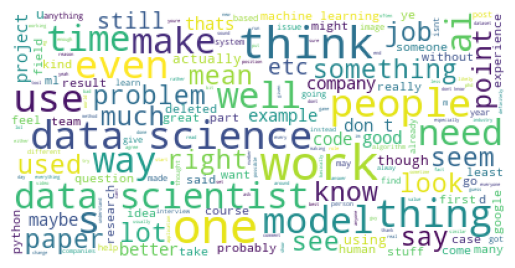

In [35]:
wordcloud = WordCloud(background_color="white",max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()